# King Country House Sales

[Dataset](https://www.kaggle.com/datasets/minasameh55/king-country-houses-aa)


## Data Description

| Column Name | Description | Data Type |
|:---|:---|:---|
| **id** | Unique numeric number assigned to each house being sold | `int64` |
| **date** | Date on which the house was sold out | `str` |
| **price** | Price of house (Target variable) | `float64` |
| **bedrooms** | Number of bedrooms in a house | `int64` |
| **bathrooms** | Number of bathrooms in a bedroom of a house | `float64` |
| **sqft_living** | Measurement of house in square foot | `int64` |
| **sqft_lot** | Square foot of the lot | `int64` |
| **floors** | Total floors (levels) of house | `float64` |
| **waterfront** | Waterfront view (0=No, 1=Yes) | `int64` |
| **view** | House viewed or not (0=No, 1=Yes) | `int64` |
| **condition** | Overall condition of a house (Scale 1-5) | `int64` |
| **grade** | Overall grade given to the housing unit (Scale 1-11) | `int64` |
| **sqft_above** | Square footage of house apart from basement | `int64` |
| **sqft_basement** | Square footage of the basement of the house | `int64` |
| **yr_built** | Date of building of the house | `int64` |
| **yr_renovated** | Year of renovation of house | `int64` |
| **zipcode** | Zipcode of the location of the house | `int64` |
| **lat** | Latitude of the location of the house | `float64` |
| **long** | Longitude of the location of the house | `float64` |
| **sqft_living15** | Living room area in 2015 (implies some renovations) | `int64` |
| **sqft_lot15** | LotSize area in 2015 (implies some renovations) | `int64` |

## Imports and config

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Models & Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, ridge_regression, Lasso

# Evaluation
import statsmodels.api as sm

# Extra
from utils import *


## Data Loading

In [2]:
file_path = "Data/king_ country_ houses_aa.csv"

df = pd.read_csv(file_path)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date                 str
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# Unique values for each column
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Minimal Data Cleaning and Transformation

To perform the fitting to the baseline model, we would like to perform the minimum data cleaning and 
transformation possible.

We are transforming the date column into 3 different columns containing the day, the month and the year.
This transformation is important to keep the information about the date which was previously in a format
that cannot be fed to the regression models, while verifying which part of the date has relevance to the prediction. 

In [5]:
df.date = pd.to_datetime(df.date)
df["year_sold"] = df.date.dt.year
df["month_sold"] = df.date.dt.month
df["day_sold"] = df.date.dt.day


In [6]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063


### Correlation between the features

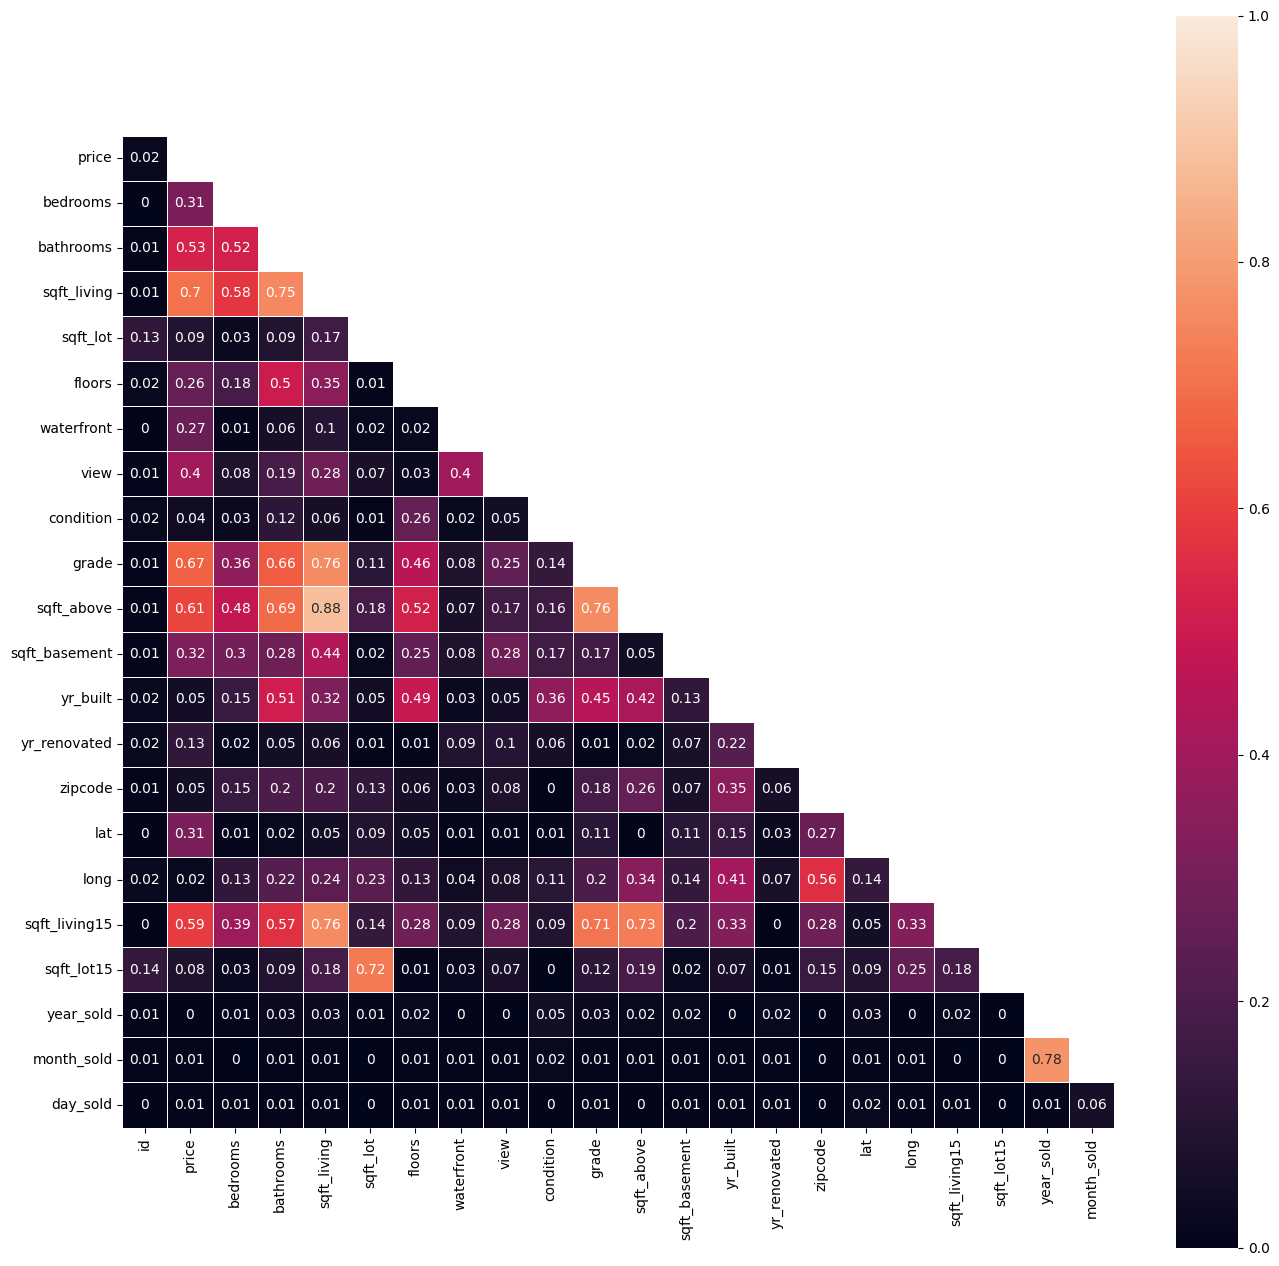

In [7]:
generate_heatmap(df.select_dtypes(include="number"))

In [8]:
# remove the id since its an identifier and has no relevance in the house pricing.
# remove the date after its transformation
df_clean = df.drop(["id", "date"], axis=1)

In [9]:
# Export cleaned and transformed data
# filename = "Data/cleaned_house_sales.csv"
# df_clean.to_csv(filename, index=False)

In [10]:
# The price is the target variable
y = df_clean["price"]

# All other variables are the features for the baseline model
X = df_clean.drop("price", axis=1)

## Baseline Model

In [11]:
# Split into train and test
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [12]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
1571,4,1.50,2000,6778,1.0,0,0,4,7,1170,...,1962,0,98198,47.3708,-122.311,1940,7531,2015,3,23
16330,4,2.50,2630,48706,2.0,0,0,3,8,2630,...,1986,0,98072,47.7750,-122.125,2680,48706,2014,5,21
12786,4,2.50,2620,9525,2.5,0,0,4,9,2620,...,1974,0,98040,47.5631,-122.219,2580,9525,2014,8,5
12524,3,2.50,1610,6000,2.0,0,0,4,7,1610,...,1993,0,98038,47.3490,-122.036,1570,6000,2014,8,26
16179,3,1.00,880,18205,1.0,0,0,4,6,880,...,1945,0,98178,47.5013,-122.244,1110,16115,2014,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,4,3.25,5180,19850,2.0,0,3,3,12,3540,...,2006,0,98006,47.5620,-122.162,3160,9750,2015,4,1
866,3,2.50,3460,6590,2.0,0,0,3,7,3460,...,2001,0,98056,47.4802,-122.188,2490,6312,2015,4,27
74,3,1.75,1790,50529,1.0,0,0,5,7,1090,...,1965,0,98042,47.3511,-122.073,1940,50529,2015,3,16
14512,2,1.00,820,5040,1.0,0,0,3,7,820,...,1953,0,98199,47.6498,-122.388,1730,5760,2014,8,20


In [13]:
y_train

1571      284950.0
16330     625000.0
12786     838400.0
12524     282000.0
16179     218000.0
           ...    
153      2250000.0
866       467000.0
74        349000.0
14512     508000.0
338       265000.0
Name: price, Length: 17290, dtype: float64

### Metrics Dataframe 

| Metric      | Why 
| ----------- | ----------------------------------------------------------------------------------------------- |
| Adjusted R² | Tells you "Quality": How well does the model explain variance, penalized for complexity?        |
| RMSE        | Tells you "Large Errors": Are there big outlier mistakes? (Penalizes large errors heavily)      |
| MAE         | Tells you "Average Error": On average, how far off is the prediction? (Robust to outliers)      |
| MedAE       | Tells you "Typical Error": What is the error for a "normal" case? (Ignores outliers completely) |

In [14]:
# Dataframe to save all metrics

columns = ["Model","Split", "R2", "Adjusted_R2", "MAE", "RMSE", "MAPE","Comments"]
metrics_df = pd.DataFrame(columns=columns)
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,RMSE,MAPE,Comments


In [15]:
from sklearn.metrics import r2_score

def adjusted_r2(y_true, y_pred, X):
    """
    Calculate Adjusted R-squared
    
    Parameters:
    - y_true: actual values
    - y_pred: predicted values
    - X: feature matrix (to get n and p)
    """
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]  # number of observations
    p = X.shape[1]  # number of predictors
    
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# Usage
# adj_r2_train = adjusted_r2(y_train, y_train_pred, X_train)
# adj_r2_test = adjusted_r2(y_test, y_test_pred, X_test)

### Linear Model: Not normalized

In [16]:
# Not normalized:
lr_not_norm = LinearRegression()
lr_not_norm.fit(X_train, y_train)

y_train_pred_nn = lr_not_norm.predict(X_train)
y_test_pred_nn = lr_not_norm.predict(X_test)


get_r_squared(y_train=y_train, y_pred_train=y_train_pred_nn, y_test = y_test, y_pred_test=y_test_pred_nn)


    R2 score:
    train | 0.6977440607209231
    test  | 0.7161824379295636
    


(0.6977440607209231, 0.7161824379295636)

In [17]:
from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             root_mean_squared_error)

def get_metrics(trained_model, X, y, split="", comments = "Baseline model"):
    columns = ["Model","Split", "R2", "Adjusted_R2", "MAE", "MAPE", "RMSE","Comments"]

    y_pred = trained_model.predict(X)

    new_row = {
        "Model": lr_not_norm.__str__().strip("()"),
        "Split": split,
        "R2": np.round(r2_score(y, y_pred),4),
        "Adjusted_R2": np.round(adjusted_r2(y, y_pred, X),4),
        "MAE": np.round(mean_absolute_error(y, y_pred),4),
        "MAPE": np.round(mean_absolute_percentage_error(y, y_pred),4),
        "RMSE": np.round(root_mean_squared_error(y, y_pred),4),
        "Comments": comments
    }

    return new_row

linear_reg_nn_metrics = get_metrics(lr_not_norm,
                                    X_train,
                                    y_train,
                                    split="train",
                                    comments="Baseline model")

metrics_df = pd.concat([metrics_df, pd.DataFrame([linear_reg_nn_metrics])], ignore_index=True)

In [18]:
linear_reg_nn_metrics = get_metrics(lr_not_norm,
                                    X_test,
                                    y_test,
                                    split="test",
                                    comments="Baseline model")

metrics_df = pd.concat([metrics_df, pd.DataFrame([linear_reg_nn_metrics])], ignore_index=True)

In [19]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,RMSE,MAPE,Comments
0,LinearRegression,train,0.6977,0.6974,125948.1118,202864.5703,0.2561,Baseline model
1,LinearRegression,test,0.7162,0.7148,125985.6747,191531.3335,0.2596,Baseline model


In [20]:
# OLS: not normalized

import statsmodels.api as sm
estimator_nn = sm.OLS(y_train, X_train) # Creates an object OLS estimator
estimator_nn = estimator_nn.fit()
estimator_nn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              8088.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):                        0.00
Time:                        11:49:59   Log-Likelihood:                     -2.3584e+05
No. Observations:               17290   AIC:                                  4.717e+05
Df Residuals:                   17270   BIC:                                  4.719e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.637e+04   2114.370    -17.202      0.000   -4.05e+04   -3.22e+04
bathrooms      4.161e+04   3683.098     11.297      0.000    3.44e+04    4.88e+04
sqft_living     111.0403      2.552     43.509      0.000     106.038     116.043
sqft_lot          0.1139      0.054      2.123      0.034       0.009       0.219
floors         5371.0191   4071.934      1.319      0.187   -2610.383    1.34e+04
waterfront     5.778e+05   1.99e+04     29.076      0.000    5.39e+05    6.17e+05
view           5.206e+04   2426.290     21.458      0.000    4.73e+04    5.68e+04
condition      2.551e+04   2646.231      9.641      0.000    2.03e+04    3.07e+04
grade          9.669e+04   2423.262     39.902      0.000    9.19e+04    1.01e+05
sqft_above       73.1607      2.532     28.894      0.000      68.198      78.124
sqft_basement    37.8796      2.990     12.671      0.000      32.020      43.739
yr_built      -2653.8504     81.477    -32.572      0.000   -2813.554   -2494.146
yr_renovated     20.1984      4.139      4.881      0.000      12.086      28.310
zipcode        -644.8994     36.078    -17.875      0.000    -715.616    -574.183
lat            6.072e+05   1.21e+04     50.121      0.000    5.83e+05    6.31e+05
long          -2.257e+05   1.48e+04    -15.286      0.000   -2.55e+05   -1.97e+05
sqft_living15    19.6702      3.876      5.074      0.000      12.072      27.268
sqft_lot15       -0.3846      0.083     -4.644      0.000      -0.547      -0.222
year_sold      5635.3040   1568.428      3.593      0.000    2561.027    8709.581
month_sold    -2811.1927    529.712     -5.307      0.000   -3849.481   -1772.904
day_sold       -424.6159    179.656     -2.363      0.018    -776.760     -72.472
==============================================================================
Omnibus:                    15223.220   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731607.437
Skew:                           3.738   Prob(JB):                         0.00
Kurtosis:                      51.453   Cond. No.                     5.85e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.12e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Linear Model: Normalized 

In [21]:
# normalization

normalizer = MinMaxScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)


In [22]:
# Linear Regression: normalized

lr = LinearRegression()
lr.fit(X_train_norm, y_train)

y_train_pred = lr.predict(X_train_norm)
y_test_pred = lr.predict(X_test_norm)


get_r_squared(y_train=y_train, y_pred_train=y_train_pred, y_test = y_test, y_pred_test=y_test_pred)


    R2 score:
    train | 0.6977440607209233
    test  | 0.6834108053685031
    


(0.6977440607209233, 0.6834108053685031)

In [23]:
# train
linear_reg_metrics = get_metrics(lr,
                                 X_train_norm,
                                 y_train,
                                 split="train",
                                 comments="Baseline model normalized")

metrics_df = pd.concat([metrics_df, pd.DataFrame([linear_reg_metrics])], ignore_index=True)

# test
linear_reg_metrics = get_metrics(lr,
                                 X_test_norm,
                                 y_test,
                                 split="test",
                                 comments="Baseline model normalized")

metrics_df = pd.concat([metrics_df, pd.DataFrame([linear_reg_metrics])], ignore_index=True)

In [24]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,RMSE,MAPE,Comments
0,LinearRegression,train,0.6977,0.6974,125948.1118,202864.5703,0.2561,Baseline model
1,LinearRegression,test,0.7162,0.7148,125985.6747,191531.3335,0.2596,Baseline model
2,LinearRegression,train,0.6977,0.6974,125948.1118,202864.5703,0.2561,Baseline model normalized
3,LinearRegression,test,0.6834,0.6819,137988.4158,202287.1258,0.2836,Baseline model normalized


In [25]:
estimator = sm.OLS(y_train, X_train_norm) # Creates an object OLS estimator
estimator = estimator.fit()
estimator.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              7984.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):                        0.00
Time:                        11:49:59   Log-Likelihood:                     -2.3594e+05
No. Observations:               17290   AIC:                                  4.719e+05
Df Residuals:                   17270   BIC:                                  4.721e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.564e+06   6.58e+04    -23.766      0.000   -1.69e+06   -1.44e+06
x2          3.188e+05   2.96e+04     10.764      0.000    2.61e+05    3.77e+05
x3          9.373e+05   1.75e+04     53.441      0.000    9.03e+05    9.72e+05
x4          1.685e+05    8.9e+04      1.893      0.058   -5999.748    3.43e+05
x5          2.793e+04   1.02e+04      2.742      0.006    7964.623    4.79e+04
x6          5.677e+05      2e+04     28.414      0.000    5.29e+05    6.07e+05
x7          2.115e+05   9762.143     21.669      0.000    1.92e+05    2.31e+05
x8          2.435e+04   9176.473      2.654      0.008    6365.955    4.23e+04
x9          8.356e+05   2.28e+04     36.611      0.000    7.91e+05     8.8e+05
x10         1.188e+06   2.41e+04     49.291      0.000    1.14e+06    1.23e+06
x11           3.9e+05   1.75e+04     22.316      0.000    3.56e+05    4.24e+05
x12        -3.377e+05   9139.698    -36.953      0.000   -3.56e+05    -3.2e+05
x13         2.434e+04   8307.838      2.930      0.003    8060.319    4.06e+04
x14        -1.606e+05   6859.606    -23.406      0.000   -1.74e+05   -1.47e+05
x15         3.519e+05   7379.332     47.682      0.000    3.37e+05    3.66e+05
x16        -3.519e+05   1.71e+04    -20.547      0.000   -3.85e+05   -3.18e+05
x17         1.099e+05   2.27e+04      4.844      0.000    6.54e+04    1.54e+05
x18        -3.397e+05   7.25e+04     -4.684      0.000   -4.82e+05   -1.98e+05
x19         2726.7556   4961.512      0.550      0.583   -6998.311    1.25e+04
x20        -4.898e+04   8118.907     -6.033      0.000   -6.49e+04   -3.31e+04
x21         -2.83e+04   5308.269     -5.331      0.000   -3.87e+04   -1.79e+04
==============================================================================
Omnibus:                    14877.120   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1551903.144
Skew:                           3.624   Prob(JB):                         0.00
Kurtosis:                      48.844   Cond. No.                     2.78e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
i = 1

for item in X_train.columns:
    print(i, item)
    i+=1

1 bedrooms
2 bathrooms
3 sqft_living
4 sqft_lot
5 floors
6 waterfront
7 view
8 condition
9 grade
10 sqft_above
11 sqft_basement
12 yr_built
13 yr_renovated
14 zipcode
15 lat
16 long
17 sqft_living15
18 sqft_lot15
19 year_sold
20 month_sold
21 day_sold


## Random Forest

## XGBoost

### Insights


In [27]:
# R2, adjusted R2, mae(mean absolute error), mse (mean square error), rmse (root mean square error)



## Conclusions & Export